# Import library

In [ ]:
!pip install pandas_ta

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Importing k-means model
from sklearn.cluster import KMeans

# Import min-max scaler
from sklearn.preprocessing import MinMaxScaler

# To creata technical indicators
import pandas_ta as ta

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read data


In [ ]:
# Read csv
url = 'https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Time%20series/Apple%20Prices.csv'
aapl = pd.read_csv(url, index_col=0, parse_dates=True)

# Features creation

In [ ]:
# Calculating 15-period future returns
time_prd = 15
aapl['fut_ret'] = aapl['close'].pct_change(
    time_prd).shift(-time_prd)

# Calculating 15mins returns
aapl['pct_change'] = aapl['close'].pct_change()

# Calculating 3.75 hours of return (e.g., 15 periods if 1 period = ~15 minutes)
aapl['ret375_hours'] = aapl['close'].pct_change(15)

# Calculating 14D returns
aapl['ret14_days'] = aapl['close'].pct_change(int(6.5 * 4 * 14))

# Calculating 1D SMA
aapl['SMA'] = aapl['close'].rolling(window=int(6.5 * 4)).mean()

# Calculating 1D volatility
aapl['Volatility'] = aapl['pct_change'].rolling(window=int(6.5 * 4)).std() * 100

# Calculating 14D volatility
aapl['Volatility14'] = aapl['pct_change'].rolling(window=int(6.5 * 4 * 14)).std() * 100

# Calculating 1D RSI
aapl['RSI'] = ta.rsi(aapl['close'], length=int(6.5 * 4))

# Calculating 1D ADX
adx = ta.adx(aapl['high'], aapl['low'], aapl['close'], length=int(6.5 * 4))
aapl['ADX'] = adx['ADX_{}'.format(int(6.5 * 4))]

# Calculating 1D ATR
aapl['ATR'] = ta.atr(aapl['high'], aapl['low'], aapl['close'], length=int(6.5 * 4))


aapl.dropna(inplace=True)
aapl.head()

,close,high,low,open,volume,fut_ret,pct_change,ret375_hours,ret14_days,SMA,Volatility,Volatility14,RSI,ADX,ATR
date,,,,,,,,,,,,,,,
2016-01-25 10:30:00,100.61,100.65,100.57,100.65,63931.0,-0.000795,-0.003467,0.004794,-0.020351,100.336923,0.331258,0.470882,58.477389,18.946444,0.394694
2016-01-25 10:45:00,100.81,100.84,100.66,100.83,133243.0,-0.004464,0.001988,0.006791,-0.020977,100.388846,0.316151,0.470793,59.476180,18.875341,0.388360
2016-01-25 11:00:00,100.47,100.55,100.47,100.55,153464.0,-0.000597,-0.003373,0.001296,-0.027208,100.440000,0.316900,0.470840,57.049975,18.705862,0.386500
2016-01-25 11:15:00,100.60,100.72,100.60,100.71,88656.0,-0.004274,0.001294,-0.000298,-0.028113,100.482692,0.311382,0.470740,57.735554,18.610218,0.381250
2016-01-25 11:30:00,100.42,100.51,100.42,100.45,125687.0,-0.006174,-0.001789,-0.001293,-0.028162,100.531154,0.305410,0.470745,56.438284,18.419749,0.373509


## Check stationary

In [ ]:
features = aapl.iloc[:, -8:].copy()
features.head()

,ret375_hours,ret14_days,SMA,Volatility,Volatility14,RSI,ADX,ATR
date,,,,,,,,
2016-01-25 10:30:00,0.004794,-0.020351,100.336923,0.331258,0.470882,58.477389,18.946444,0.394694
2016-01-25 10:45:00,0.006791,-0.020977,100.388846,0.316151,0.470793,59.476180,18.875341,0.388360
2016-01-25 11:00:00,0.001296,-0.027208,100.440000,0.316900,0.470840,57.049975,18.705862,0.386500
2016-01-25 11:15:00,-0.000298,-0.028113,100.482692,0.311382,0.470740,57.735554,18.610218,0.381250
2016-01-25 11:30:00,-0.001293,-0.028162,100.531154,0.305410,0.470745,56.438284,18.419749,0.373509


In [ ]:
from statsmodels.tsa.stattools import adfuller

# List to store non-stationary columns
non_stationary_columns = []

# Check stationarity for each column
for col in features.columns:
    try:
        result = adfuller(features[col].dropna())  # Drop NaN values to avoid errors
        if result[1] < 0.05:
            print(f"{col} is stationary.")
        else:
            print(f"{col} is not stationary.")
            non_stationary_columns.append(col)
    except Exception as e:
        print(f"Error checking stationarity for {col}: {e}")
        non_stationary_columns.append(col)

# Drop non-stationary columns from the original DataFrame
aapl.drop(columns=non_stationary_columns, inplace=True)
features.drop(columns=non_stationary_columns, inplace=True)

# Check column non-stationary features dropped
drop_feat_check = set(non_stationary_columns).intersection(features.columns)
drop_og_check = set(non_stationary_columns).intersection(aapl.columns)
if drop_feat_check and drop_og_check: print('Features not drop')
aapl.head()

ret375_hours is stationary.
ret14_days is stationary.
SMA is not stationary.
Volatility is stationary.
Volatility14 is stationary.
RSI is stationary.
ADX is stationary.
ATR is stationary.


,close,high,low,open,volume,fut_ret,pct_change,ret375_hours,ret14_days,Volatility,Volatility14,RSI,ADX,ATR
date,,,,,,,,,,,,,,
2016-01-25 10:30:00,100.61,100.65,100.57,100.65,63931.0,-0.000795,-0.003467,0.004794,-0.020351,0.331258,0.470882,58.477389,18.946444,0.394694
2016-01-25 10:45:00,100.81,100.84,100.66,100.83,133243.0,-0.004464,0.001988,0.006791,-0.020977,0.316151,0.470793,59.476180,18.875341,0.388360
2016-01-25 11:00:00,100.47,100.55,100.47,100.55,153464.0,-0.000597,-0.003373,0.001296,-0.027208,0.316900,0.470840,57.049975,18.705862,0.386500
2016-01-25 11:15:00,100.60,100.72,100.60,100.71,88656.0,-0.004274,0.001294,-0.000298,-0.028113,0.311382,0.470740,57.735554,18.610218,0.381250
2016-01-25 11:30:00,100.42,100.51,100.42,100.45,125687.0,-0.006174,-0.001789,-0.001293,-0.028162,0.305410,0.470745,56.438284,18.419749,0.373509


## Check correlation

To check for correlation, I'll take threshold value of 70 and take action on a pair that gives a value above this.

### Correlation with target feature

In [ ]:
# # Define the target feature and threshold
# target_feature = "ret375_hours"  # Replace with the feature you are exploring
# threshold = 0.7

# # Get correlations for the target feature
# target_corr = abs(features.corr()[target_feature])

# # Filter for correlations above the threshold, excluding self-correlation
# high_corr_features = target_corr[
#     (target_corr > threshold) & (target_corr.index != target_feature)
# ]

# # Print results
# print(f"Features highly correlated with {target_feature}:")
# high_corr_features


### Global correlation

In [ ]:
# Compute the absolute correlation matrix
absolute_corr_matrix = abs(features.corr())

# Mask the lower triangle and diagonal to remove duplicates and self-correlation
upper_triangle_mask = absolute_corr_matrix.where(
    np.triu(np.ones(absolute_corr_matrix.shape), k=1).astype(bool)
)

# Find pairs with correlation > 0.7
high_corr_pairs = upper_triangle_mask.stack()  # Unstack the upper triangle
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.7]  # Filter by threshold

# Display the results
for pair, corr_value in high_corr_pairs.items():
    print(f"Pair: {pair}, Correlation: {corr_value}")

Pair: ('Volatility', 'ATR'), Correlation: 0.7738743025998226
Pair: ('Volatility14', 'ATR'), Correlation: 0.766215504685399


`ATR` is correlated with both `Volatility` and `Volatility14`.

Remove `ATR` from our features.

In [ ]:
# Find columns with high correlation (threshold > 0.7)
threshold = 0.7
to_drop = [
    column for column in upper_triangle_mask.columns
    if any(upper_triangle_mask[column] > threshold)
]

print("Columns to drop:", to_drop)
aapl.drop(columns=to_drop, inplace=True)
features.drop(columns=to_drop, inplace=True)

Columns to drop: ['ATR']


In [ ]:
print(f'Features: {features.columns}\n')
print(f'AAPL: {aapl.columns}\n')

Features: Index(['ret375_hours', 'ret14_days', 'Volatility', 'Volatility14', 'RSI',
       'ADX'],
      dtype='object')

AAPL: Index(['close', 'high', 'low', 'open', 'volume', 'fut_ret', 'pct_change',
       'ret375_hours', 'ret14_days', 'Volatility', 'Volatility14', 'RSI',
       'ADX'],
      dtype='object')



# Train Test Split and Scaling

Split data into training and testing datasets with 75% of the data will belong to training and the balance to testing.

After finding the clusters using the training data set, check their effectiveness using the test data set.

Scale the features using the min-max scaler technique.

In [ ]:
# Split and get features_train and features_test
split = int(len(features) * 0.75)
features_train, features_test = features[:split], features[split:]

# Slicing apple_prices to get apple_prices_train and apple_prices_test
apple_prices_train, apple_prices_test = aapl[:split], aapl[split:]

# Fit MinMaxScaler on features_train
scaler = MinMaxScaler().fit(features_train)

# Scale features_train using the `scaler` initialised above
features_train_scaled = pd.DataFrame(scaler.transform(
    features_train), columns=features.columns, index=features_train.index)

# Scale features_test using the `scaler` initialised above
features_test_scaled = pd.DataFrame(scaler.transform(
    features_test), columns=features.columns, index=features_test.index)

print("Training data set shape          : ", features_train_scaled.shape)
print("Test data set shape              : ", features_test_scaled.shape)

print("Apple prices train data set shape: ", apple_prices_train.shape)
print("Apple prices test data set shape : ", apple_prices_test.shape)

Training data set shape          :  (20654, 6)
Test data set shape              :  (6885, 6)
Apple prices train data set shape:  (20654, 13)
Apple prices test data set shape :  (6885, 13)


In [ ]:
print(f'features columns: {features_train.columns}\n')
print(f'AAPL columns: {apple_prices_train.columns}')

features columns: Index(['ret375_hours', 'ret14_days', 'Volatility', 'Volatility14', 'RSI',
       'ADX'],
      dtype='object')

AAPL columns: Index(['close', 'high', 'low', 'open', 'volume', 'fut_ret', 'pct_change',
       'ret375_hours', 'ret14_days', 'Volatility', 'Volatility14', 'RSI',
       'ADX'],
      dtype='object')


<a id='optimal'></a>
# Choose the Optimum Number of Clusters and Creating Clusters
We will choose the optimal number of clusters using the elbow curve method.

Fit the k-means model with the optimal number of clusters, using the `features_train` dataset. After that check what cluster number an observation belongs to in the test dataset using the `predict` method.



In [ ]:
# Define a function to calculate WCSS for a given number of clusters
def kmeans_fit(data, num_clusters):
    """
    Fit KMeans for a given number of clusters and return the WCSS (inertia).
    """
    kmeans = KMeans(n_clusters=num_clusters, random_state=40)
    kmeans.fit(data)
    return kmeans.inertia_

# Create a range for the number of clusters to test
cluster_range = range(1, 31)

# Initialize an empty list to store WCSS values
wcss_values = []

# Calculate WCSS for each number of clusters
for n_clusters in cluster_range:
    wcss = kmeans_fit(features_train_scaled, n_clusters)
    wcss_values.append(wcss)

# Create a DataFrame to store the results
wcss_df = pd.DataFrame({
    "Number of Clusters": list(cluster_range),
    "WCSS": wcss_values
})

# Display the first few rows of the DataFrame
wcss_df.head()

,Number of Clusters,WCSS
0,1,2616.789994
1,2,1905.154097
2,3,1488.918948
3,4,1333.071089
4,5,1163.071306


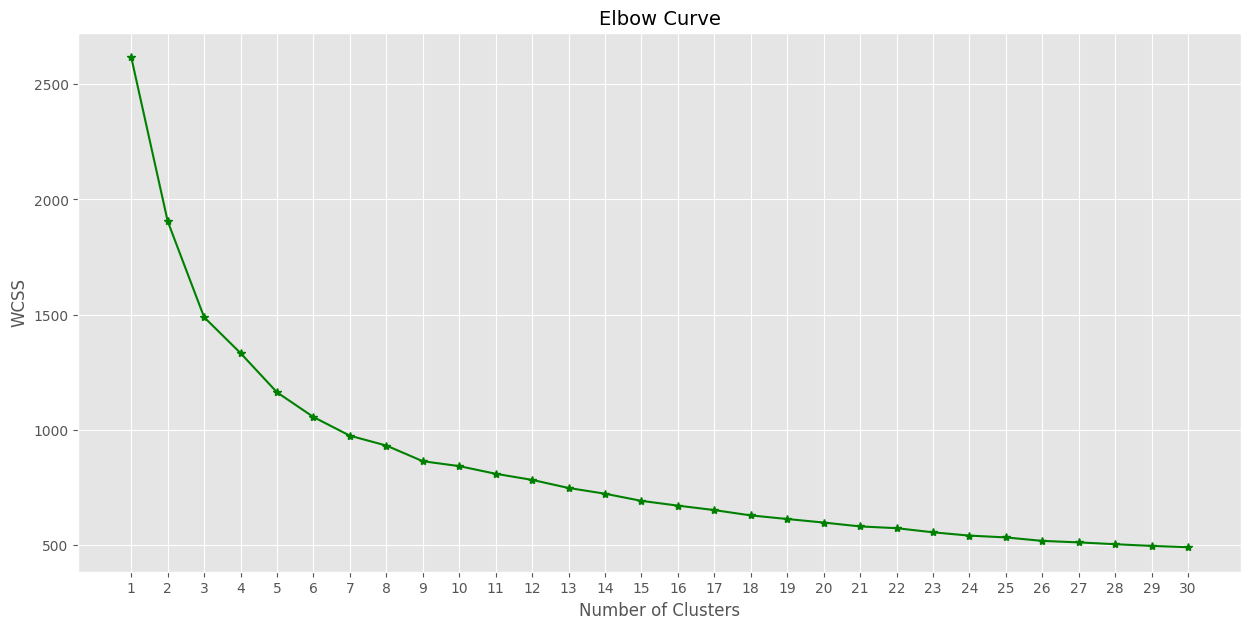

In [ ]:
# Plotting the elbow curve
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_xticks(wcss_df["Number of Clusters"])
ax.plot(wcss_df["Number of Clusters"], wcss_df["WCSS"], 'g*-')
ax.set_xlabel("Number of Clusters", fontsize=12)
ax.set_ylabel("WCSS", fontsize=12)
ax.set_title("Elbow Curve", fontsize=14);

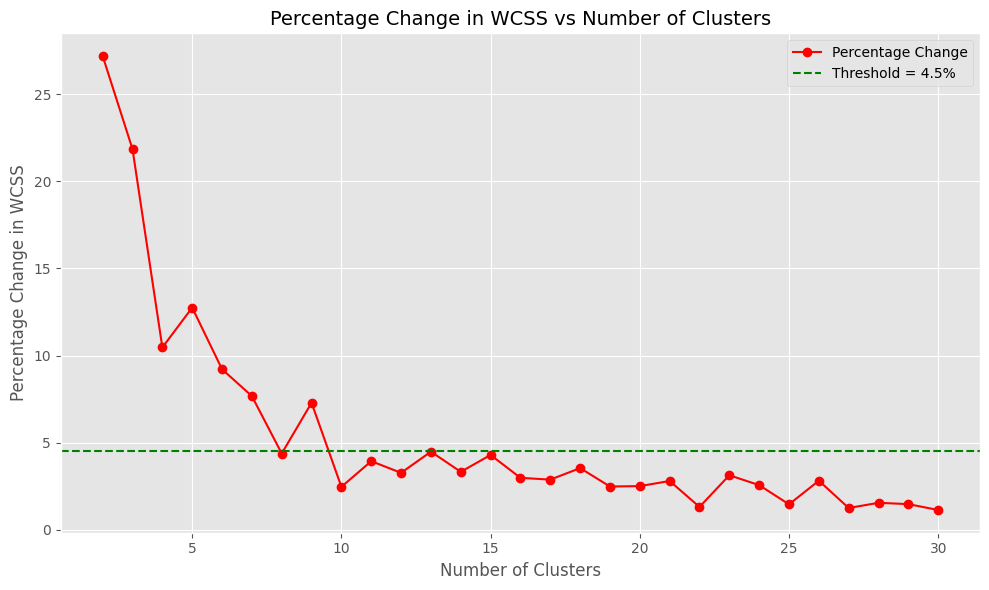

In [ ]:
# Calculate percentage change in WCSS
wcss_df["pct_change"] = wcss_df["WCSS"].pct_change().abs() * 100

# Define the threshold value
threshold = 4.5

# Plot percentage change in WCSS
plt.figure(figsize=(10, 6))  # Smaller, more compact figure
plt.plot(wcss_df["Number of Clusters"], wcss_df["pct_change"], 'ro-', label="Percentage Change")
plt.axhline(threshold, color='g', linestyle="--", label=f"Threshold = {threshold}%")

# Add labels, title, and legend
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Percentage Change in WCSS", fontsize=12)
plt.title("Percentage Change in WCSS vs Number of Clusters", fontsize=14)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [ ]:
def kmeans_fit(num_clusters, data):
    """
    Fit KMeans for a given number of clusters and return the WCSS (inertia).
    """
    model = KMeans(n_clusters=num_clusters, random_state=40)
    model.fit(data)
    return model.inertia_

def get_number_of_clusters(features, threshold=4.5, max_range=30):
    """
    Determine the optimal number of clusters using the elbow method and WCSS threshold.
    """
    if max_range <= 0 or threshold <= 0:
        raise ValueError("max_range and threshold must be positive values.")

    # Calculate WCSS for each number of clusters
    wcss = [kmeans_fit(n, features) for n in range(1, max_range + 1)]

    # Create WCSS DataFrame
    wcss_df = pd.DataFrame({
        "Number of Clusters": list(range(1, max_range + 1)),
        "WCSS": wcss
    })
    wcss_df["pct_change"] = wcss_df["WCSS"].pct_change().abs() * 100

    # Find the optimal number of clusters
    filtered_df = wcss_df[wcss_df["pct_change"] < threshold]
    if filtered_df.empty:
        raise ValueError("No suitable number of clusters found within the threshold.")
    optimal_clusters = filtered_df.iloc[0]["Number of Clusters"]

    return int(optimal_clusters)

In [ ]:
# Getting optimal number of clusters
num_clusters = get_number_of_clusters(
    features_train, threshold=4, max_range=30)

# Initialise the model with num_clusters
model = KMeans(n_clusters=num_clusters, random_state=40)

# Fit the model on features_train
model.fit(features_train)

# Getting the cluster for each observation in the train data set
apple_prices_train["cluster"] = model.predict(features_train)

# Getting the cluster for each observation in the test data set
apple_prices_test["cluster"] = model.predict(features_test)

print("Number of clusters: ", num_clusters)
print("Apple prices train data set shape: ", apple_prices_train.shape)
print("Apple prices test data set shape : ", apple_prices_test.shape)
apple_prices_test.head()

Number of clusters:  21
Apple prices train data set shape:  (20654, 14)
Apple prices test data set shape :  (6885, 14)


,close,high,low,open,volume,fut_ret,pct_change,ret375_hours,ret14_days,Volatility,Volatility14,RSI,ADX,cluster
date,,,,,,,,,,,,,,
2019-04-10 11:00:00,199.54,199.63,199.54,199.54,49063.0,0.000651,0.000652,-0.002250,0.024753,0.205856,0.251258,49.381530,20.758366,10
2019-04-10 11:15:00,199.50,199.49,199.40,199.42,21562.0,0.002155,-0.000200,-0.000851,0.026287,0.200467,0.251090,49.116434,20.340828,10
2019-04-10 11:30:00,199.38,199.48,199.37,199.49,27096.0,0.004915,-0.000602,-0.000050,0.024142,0.198445,0.251005,48.307325,19.953605,10
2019-04-10 11:45:00,199.35,199.34,199.26,199.25,29503.0,0.006872,-0.000150,-0.001853,0.023147,0.198571,0.250976,48.101305,19.634578,10
2019-04-10 12:00:00,199.32,199.36,199.30,199.34,14003.0,0.006673,-0.000150,-0.001503,0.023729,0.197963,0.250945,47.888900,19.315315,10


<a id='signal'></a>
# Analyse the Clusters and Generate Signals
We will analyse the clusters based on hit ratio.


In [ ]:
# Get unique clusters
unique_clusters = apple_prices_train["cluster"].unique()

# Create an empty dataframe to store the results
hit_ratio_clusters = pd.DataFrame(columns=["cluster_number", "percentage_positive_rets", "percentage_negative_rets", "direction_hit_ratio"])
hit_ratio_clusters["cluster_number"] = unique_clusters

# Loop through each cluster to calculate hit ratios
for cluster_number in unique_clusters:
    # Filter the training dataset for the current cluster
    fut_returns = apple_prices_train[apple_prices_train["cluster"] == cluster_number]

    # Calculate the total number of trades
    total_trades = fut_returns["fut_ret"].count()

    # Handle cases with no trades
    if total_trades == 0:
        hit_ratio_clusters.loc[hit_ratio_clusters["fut_ret"] == cluster_number, "percentage_positive_rets"] = 0
        hit_ratio_clusters.loc[hit_ratio_clusters["fut_ret"] == cluster_number, "percentage_negative_rets"] = 0
        continue

    # Calculate the number of positive and negative trades
    positive_trades = fut_returns[fut_returns["fut_ret"] > 0]["fut_ret"].count()
    negative_trades = fut_returns[fut_returns["fut_ret"] < 0]["fut_ret"].count()

    # Calculate the percentages
    hit_ratio_clusters.loc[hit_ratio_clusters["cluster_number"] == cluster_number, "percentage_positive_rets"] = round((positive_trades / total_trades) * 100, 2)
    hit_ratio_clusters.loc[hit_ratio_clusters["cluster_number"] == cluster_number, "percentage_negative_rets"] = round((negative_trades / total_trades) * 100, 2)

# Assign direction based on the hit ratio
hit_ratio_clusters["direction_hit_ratio"] = 0
hit_ratio_clusters.loc[hit_ratio_clusters["percentage_positive_rets"] >= 55, "direction_hit_ratio"] = 1  # Long
hit_ratio_clusters.loc[hit_ratio_clusters["percentage_negative_rets"] >= 55, "direction_hit_ratio"] = -1  # Short
hit_ratio_clusters

,cluster_number,percentage_positive_rets,percentage_negative_rets,direction_hit_ratio
0,4,55.28,44.24,1
1,16,53.0,46.57,0
2,7,50.09,49.36,0
3,0,52.85,46.71,0
4,10,52.04,47.87,0
5,9,55.45,44.36,1
6,20,52.01,47.39,0
7,2,57.18,42.55,1
8,8,50.08,49.61,0
9,5,53.68,46.01,0


In [ ]:
test_index = apple_prices_test.index

# # Merge the results with the testing dataset
apple_prices_test = apple_prices_test.merge(hit_ratio_clusters[["cluster_number", "direction_hit_ratio"]],
                                            left_on="cluster",
                                            right_on="cluster_number",
                                            how="left").drop(columns=["cluster_number"])
apple_prices_test.index = test_index
apple_prices_test.rename(columns={'direction':'direction_hit_ratio'}, inplace=True)
apple_prices_test.head()

,close,high,low,open,volume,fut_ret,pct_change,ret375_hours,ret14_days,Volatility,Volatility14,RSI,ADX,cluster,direction_hit_ratio
date,,,,,,,,,,,,,,,
2019-04-10 11:00:00,199.54,199.63,199.54,199.54,49063.0,0.000651,0.000652,-0.002250,0.024753,0.205856,0.251258,49.381530,20.758366,10,0
2019-04-10 11:15:00,199.50,199.49,199.40,199.42,21562.0,0.002155,-0.000200,-0.000851,0.026287,0.200467,0.251090,49.116434,20.340828,10,0
2019-04-10 11:30:00,199.38,199.48,199.37,199.49,27096.0,0.004915,-0.000602,-0.000050,0.024142,0.198445,0.251005,48.307325,19.953605,10,0
2019-04-10 11:45:00,199.35,199.34,199.26,199.25,29503.0,0.006872,-0.000150,-0.001853,0.023147,0.198571,0.250976,48.101305,19.634578,10,0
2019-04-10 12:00:00,199.32,199.36,199.30,199.34,14003.0,0.006673,-0.000150,-0.001503,0.023729,0.197963,0.250945,47.888900,19.315315,10,0


# Strategy

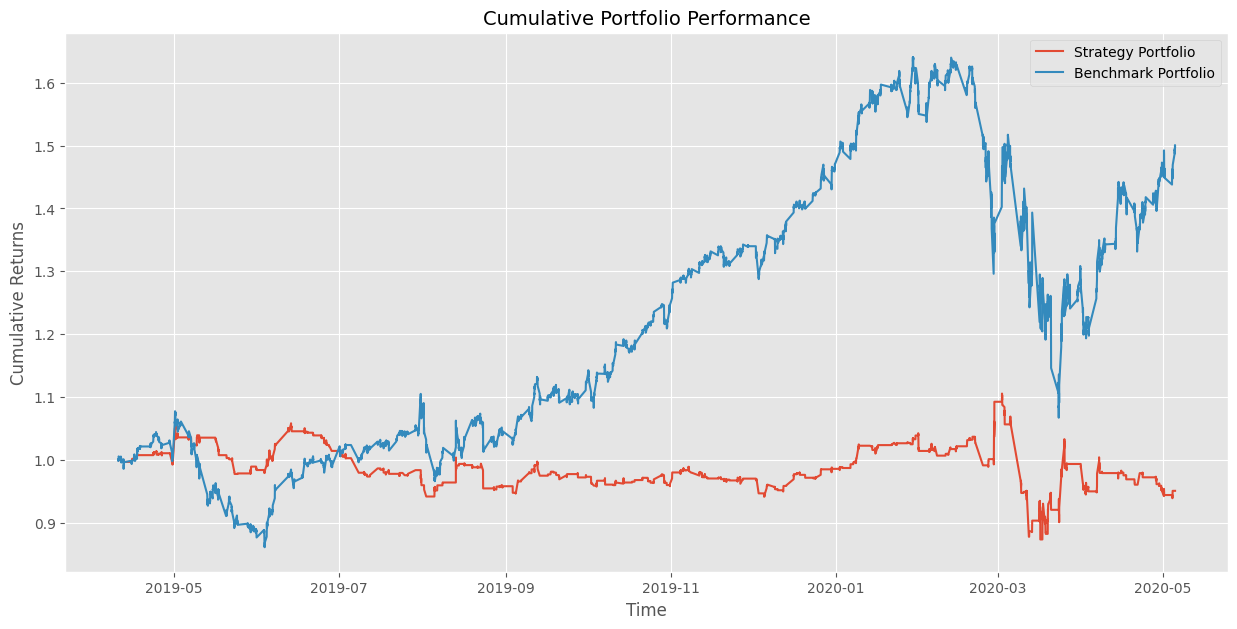

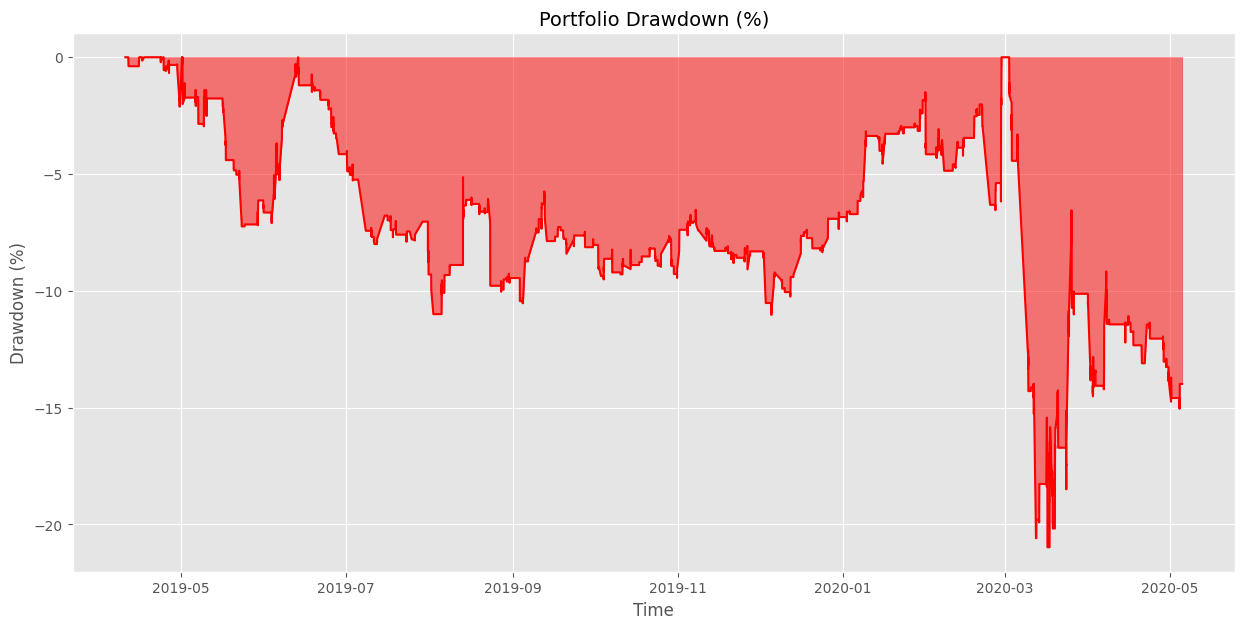

Total Returns: -4.88%
Annualized Returns: -0.18%
Maximum Drawdown: -20.97%
Return-to-Max Drawdown Ratio: -0.01


In [ ]:
# Calculate the buy and hold returns
benchmark_returns = (
    1 + apple_prices_test["close"].pct_change()).cumprod().dropna()

# Calculate the strategy returns based on hit ratio analysis
apple_prices_test['returns'] = apple_prices_test["close"].pct_change(
) * apple_prices_test["direction_hit_ratio"].shift(1)

# Calculate the cumulative returns
apple_prices_test['cumulative_returns_hit_ratio'] = (
    1 + apple_prices_test['returns']).cumprod()

# Drop rows with missing values
apple_prices_test.dropna(inplace=True)


# Calculate the final cumulative returns
strategy_portfolio_value = apple_prices_test['cumulative_returns_hit_ratio']
final_returns = strategy_portfolio_value.iloc[-1]

# Calculate the initial cumulative returns
initial_returns = strategy_portfolio_value.iloc[0]

# Calculate the total number of trading days
trading_days = len(strategy_portfolio_value)

# Calculate the total returns
total_returns = (final_returns / initial_returns - 1) * 100

# Calculate the annualized returns
annualized_returns = ((final_returns / initial_returns) ** (252 / trading_days) - 1) * 100

# Calculate the running maximum of the portfolio value
running_max = np.maximum.accumulate(strategy_portfolio_value.dropna())

# Ensure the running maximum doesn't fall below 1
running_max[running_max < 1] = 1

# Calculate the drawdown as a percentage
running_drawdown = 100 * ((strategy_portfolio_value / running_max) - 1)

# Calculate the maximum drawdown
max_drawdown = running_drawdown.min()

# Calculate the return-to-max-drawdown (MDD) ratio
return_to_MDD_ratio = annualized_returns / abs(max_drawdown)

# Plot the cumulative portfolio value
plt.figure(figsize=(15, 7))
plt.title("Cumulative Portfolio Performance", fontsize=14)
plt.plot(strategy_portfolio_value, label="Strategy Portfolio")

if benchmark_returns is not None:
    plt.plot(benchmark_returns, label="Benchmark Portfolio")

plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.show()

# Step 12: Plot the drawdown
plt.figure(figsize=(15, 7))
plt.title("Portfolio Drawdown (%)", fontsize=14)
plt.plot(running_drawdown, color="red")
plt.fill_between(running_drawdown.index, running_drawdown.values, color="red", alpha=0.5)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Drawdown (%)", fontsize=12)
plt.show()

# Step 13: Print performance metrics
print(f"Total Returns: {total_returns:.2f}%")
print(f"Annualized Returns: {annualized_returns:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")
print(f"Return-to-Max Drawdown Ratio: {return_to_MDD_ratio:.2f}")


Trade-wise analytics for strategy based on hit ratio.

In [ ]:
# Initialize an empty list to store trade details
trade_records = []

# Initialize variables to track the current position and trade entry time
current_position = 0  # Tracks whether we're in a long (1), short (-1), or neutral (0) position
entry_time = None  # Records when a position was entered

# Loop through the dataframe row by row
for i in apple_prices_test.index:
    # Get the new position signal for the current row
    new_position = apple_prices_test.loc[i, 'direction_hit_ratio']  # Replace 'signal_column' with the actual signal column name

    # Check if the position has changed
    if new_position != current_position:
        # If there was an active position, record its details
        if current_position != 0 and entry_time is not None:
            entry_price = apple_prices_test.loc[entry_time, 'close']  # Replace 'close_column' with the actual price column name
            exit_time = i  # Current index is the exit time
            exit_price = apple_prices_test.loc[exit_time, 'close']  # Exit price

            # Record trade details
            trade_records.append({
                'Position': current_position,
                'Entry Time': entry_time,
                'Entry Price': entry_price,
                'Exit Time': exit_time,
                'Exit Price': exit_price,
                'PnL': (exit_price - entry_price) * current_position
            })

        # Update entry time for the new position, if it's not neutral
        entry_time = i if new_position != 0 else None

        # Update the current position
        current_position = new_position

# Convert the list of trade details into a DataFrame
trades = pd.DataFrame(trade_records)

# Display the resulting trades DataFrame
trades


,Position,Entry Time,Entry Price,Exit Time,Exit Price,PnL
0,1,2019-04-11 12:30:00,199.990,2019-04-11 12:45:00,200.200,0.210
1,1,2019-04-11 13:00:00,200.000,2019-04-11 13:45:00,199.230,-0.770
2,1,2019-04-15 10:45:00,198.600,2019-04-15 11:00:00,198.890,0.290
3,1,2019-04-15 11:15:00,198.880,2019-04-15 11:30:00,198.980,0.100
4,1,2019-04-15 11:45:00,198.620,2019-04-15 13:00:00,198.900,0.280
...,...,...,...,...,...,...
345,1,2020-04-30 15:00:00,291.485,2020-04-30 15:30:00,291.155,-0.330
346,1,2020-04-30 15:45:00,293.910,2020-05-01 09:30:00,291.284,-2.626
347,1,2020-05-01 09:45:00,294.189,2020-05-01 11:30:00,294.730,0.541
348,1,2020-05-04 12:30:00,290.330,2020-05-04 14:00:00,290.900,0.570


In [ ]:
# Create a DataFrame to store analytics
analytics = {}

# Calculate the number of long trades
num_of_long = len(trades[trades['Position'] == 1])
analytics["Number of long trades"] = num_of_long

# Calculate the number of short trades
num_of_short = len(trades[trades['Position'] == -1])
analytics["Number of short trades"] = num_of_short

# Calculate the total number of trades
total_trades = num_of_long + num_of_short
analytics["Total number of trades"] = total_trades

# Calculate gross profit (PnL > 0)
gross_profit = trades.loc[trades['PnL'] > 0, 'PnL'].sum()
analytics["Gross profit"] = round(gross_profit, 2)

# Calculate gross loss (PnL < 0)
gross_loss = trades.loc[trades['PnL'] < 0, 'PnL'].sum()
analytics["Gross loss"] = round(gross_loss, 2)

# Calculate net profit
net_profit = trades['PnL'].sum()
analytics["Net profit"] = round(net_profit, 2)

# Count winning trades (PnL > 0)
winners = len(trades[trades['PnL'] > 0])
analytics["Number of winners"] = winners

# Count losing trades (PnL <= 0)
losers = len(trades[trades['PnL'] <= 0])
analytics["Number of losers"] = losers

# Calculate winning percentage
win_percentage = (winners / total_trades) * 100 if total_trades > 0 else 0
analytics["Winning percentage"] = round(win_percentage, 2)

# Calculate losing percentage
loss_percentage = (losers / total_trades) * 100 if total_trades > 0 else 0
analytics["Losing percentage"] = round(loss_percentage, 2)

# Calculate average PnL per winning trade
avg_pnl_winners = trades.loc[trades['PnL'] > 0, 'PnL'].mean()
analytics["Avg. profit per winning trade"] = round(avg_pnl_winners, 2) if not pd.isna(avg_pnl_winners) else 0

# Calculate average PnL per losing trade
avg_pnl_losers = trades.loc[trades['PnL'] <= 0, 'PnL'].mean()
analytics["Avg. loss per losing trade"] = round(avg_pnl_losers, 2) if not pd.isna(avg_pnl_losers) else 0

# Convert analytics dictionary to a transposed DataFrame
analytics_df = pd.DataFrame(analytics, index=['Strategy']).T

analytics_df

,Strategy
Number of long trades,344.00
Number of short trades,6.00
Total number of trades,350.00
Gross profit,265.08
Gross loss,-280.41
Net profit,-15.33
Number of winners,168.00
Number of losers,182.00
Winning percentage,48.00
Losing percentage,52.00
